## Reconstruction in the case $\varepsilon_{12}=0$ in some regions  — Figure 7


In [1]:
import dolfin as df
import math
import matplotlib.pyplot as plt
import numpy as np
import os

from elasticity_problem import elasticity_problem
from rec_no_reg import no_reg_rec
%load_ext autoreload
%autoreload 2

### True parameter mu

In [2]:
# mu_2
class Mu2Expression(df.UserExpression):
    def eval(self, value, x):
        value[0]=0
        if (x[0] - 0.2) *(x[0] - 0.2)  + (x[1] - 0.8) *(x[1] - 0.8)  <= 0.1  *0.1 :
            value[0]= 1
        elif  0.1  *0.1 <= (x[0] - 0.2) *(x[0] - 0.2)  + (x[1] - 0.8) *(x[1] - 0.8)  <= 0.15  *0.15 :
            value[0]= (1-(math.sqrt((x[0] - 0.2) *(x[0] - 0.2)  + (x[1] - 0.8) *(x[1] - 0.8)) - 0.1)/0.05 )**2*(1+2*(math.sqrt((x[0] - 0.2)*(x[0] - 0.2)  + (x[1] - 0.8) *(x[1] - 0.8))-0.1) /0.05) 
        elif (x[0] - 0.8) *(x[0] - 0.8)  + (x[1] - 0.2) *(x[1] - 0.2)  <= 0.1  *0.1 :
            value[0]= 2
        elif  0.1  *0.1 <= (x[0] - 0.8) *(x[0] - 0.8)  + (x[1] - 0.2) *(x[1] - 0.2)  <= 0.15  *0.15 :
            value[0]=2*(1-(math.sqrt((x[0] - 0.8) *(x[0] - 0.8)  + (x[1] - 0.2) *(x[1] - 0.2)) - 0.1)/0.05 )**2*(1+2*(math.sqrt((x[0] - 0.8)*(x[0] - 0.8)  + (x[1] - 0.2) *(x[1] - 0.2))-0.1) /0.05)     
        value[0] = 1+value[0]

mu = Mu2Expression()


### Problem parameters

In [3]:
omega = 10 
rho = 1
degree = 3
dim = 2
Nx = 200
Ny = 200
u_boundary = df.Expression(('x[1]', 0), degree=1)
f = df.Constant((0,0))
tol = 1e-15

mesh_params = {"Nx":Nx, "Ny":Ny, "degree":degree}
load_params = {"u_boundary":u_boundary, "f":f} 
mat_params  = {"mu":mu, "rho":rho, "omega":omega}

### Direct problem

In [4]:
u, eps_12, mu_function = elasticity_problem(
    mesh_params=mesh_params,
    mat_params=mat_params,
    load_params=load_params)


Solving linear variational problem.


### Figures 1 and 2

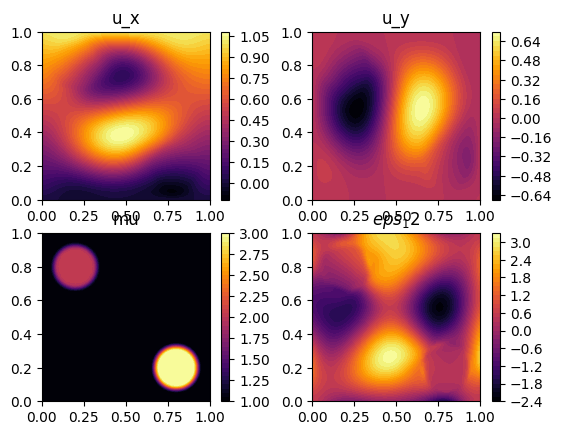

In [5]:
#Plot u 
u1, u2 = u.split()
plt.subplot(2,2,1)
p = df.plot(u1, title="u_x", cmap="inferno")
plt.colorbar(p) 

plt.subplot(2,2,2)
p = df.plot(u2, title="u_y", cmap="inferno")
plt.colorbar(p) 

plt.subplot(2,2,3)
p = df.plot(mu_function, title="mu", cmap="inferno")
plt.colorbar(p) 


plt.subplot(2,2,4)
p = df.plot(eps_12, title="$eps_12$", cmap="inferno")
plt.colorbar(p) 

### Inverse Problem - Noiseless data - Figure 3b

Solving linear variational problem.
Solving linear variational problem.
the L2-norm error for the reconstruction: 0.3852339784028397


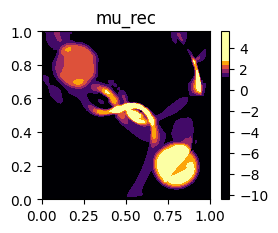

In [ ]:
mu_rec, err, prim = no_reg_rec(
    u,
    mesh_params=mesh_params,
    mat_params=mat_params,
    load_params=load_params,
    compute_prim= True)

plt.subplot(2,2,3)
p = df.plot(mu_rec, title="mu_rec", cmap="inferno", vmin=1.0, vmax=3.0)
plt.colorbar(p) 